In [1]:
%matplotlib inline
import pandas as pd

## 이상점(Outlier)   
- 다른 값들과 너무 동떨어져 있는 데이터  
- 어쩌면 부정확한 데이터   

### 이상점을 판단하는 기준 
box plot의 IQR(Interquartile Range = 25% ~ 75%)에서 1.5 IQR 떨어져 있으면 이상점

In [3]:
df = pd.read_csv('beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

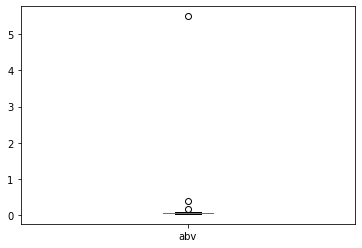

In [4]:
df.plot(kind='box', y='abv') #이상점 

In [6]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [7]:
df['abv'].quantile(0.25)

0.05

In [20]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [21]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)

In [23]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [24]:
df.loc[2250, 'abv'] = 0.055

In [25]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [26]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [27]:
df.drop(df[condition].index, inplace=True)

In [28]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot:>

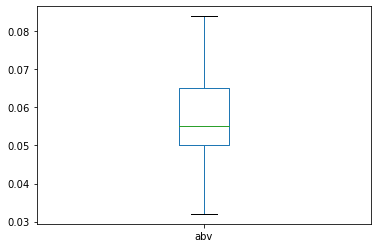

In [29]:
df.plot(kind='box', y='abv')

In [30]:
df = pd.read_csv('exam_outlier.csv')

## 관계적 이상점(Relational Outlier)
- 두 변수의 관계를 고려했을 때 이상한 데이터

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

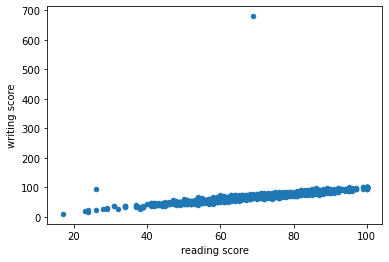

In [31]:
df.plot(kind='scatter', x= 'reading score', y='writing score')

In [33]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [34]:
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [36]:
df.drop(51, inplace=True)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

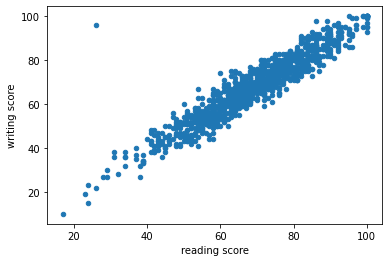

In [37]:
df.plot(kind='scatter', x= 'reading score', y='writing score')

In [38]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [39]:
condition = (df['writing score'] > 90) & (df['reading score'] < 40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [42]:
df.drop(373, inplace=True)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

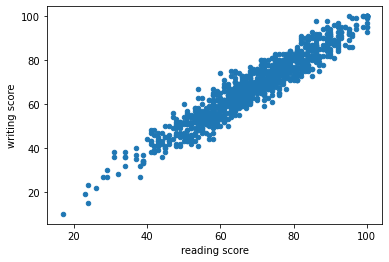

In [43]:
df.plot(kind='scatter', x= 'reading score', y='writing score')

In [49]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817853,0.803006
reading score,0.817853,1.000000,0.954474
writing score,0.803006,0.954474,1.000000
